# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'legend.frameon':True})
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# Loads

In [2]:
df = pd.read_csv('csv/train.csv', encoding = 'utf-8')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('col,not_null,not_null_pc,unique')
for col in df.columns:
    msg = col
    not_null = df[df[col].isnull() == False]
    msg += ',%s,%s,%s'%(len(not_null), np.round(len(not_null) / len(df) * 100, 2), len(df[col].unique()))
    print(msg)

col,not_null,not_null_pc,unique
PassengerId,891,100.0,891
Survived,891,100.0,2
Pclass,891,100.0,3
Name,891,100.0,891
Sex,891,100.0,2
Age,714,80.13,89
SibSp,891,100.0,7
Parch,891,100.0,7
Ticket,891,100.0,681
Fare,891,100.0,248
Cabin,204,22.9,148
Embarked,889,99.78,4


# Deal with missing

## Fill Age NaN

In [5]:
def missing_ages(df):
    for groups in df.drop(df[df['Age'].isnull()].index).groupby(['Pclass', 'Sex'])['Age'].median().items():
        for rows in df[df['Age'].isnull()].iterrows():
            if rows[1]['Pclass'] == groups[0][0] and rows[1]['Sex'] == groups[0][1]:
                df.loc[rows[0], 'Age'] = groups[1]

missing_ages(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Drop Embarked missing

In [6]:
df = df.dropna(subset=['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


# Extract Title

In [7]:
df['Title'] = df['Name'].apply(lambda x: str(x).split('.')[0].split(' ')[-1])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Create Family

In [8]:
df['family'] = df['SibSp'] + df['Parch']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
family         889 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


# Band continuous

In [9]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df['FareBand'] = pd.cut(df['Fare'], 5)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
family         889 non-null int64
AgeBand        889 non-null category
FareBand       889 non-null category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 106.4+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(16.336, 32.252]","(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,"(32.252, 48.168]","(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,"(16.336, 32.252]","(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,"(32.252, 48.168]","(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,"(32.252, 48.168]","(-0.512, 102.466]"


# Encode Categorical

In [10]:
for col in ['Sex', 'Embarked', 'Title', 'AgeBand', 'FareBand']:
    df[col] = pd.Categorical(df[col]).codes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null int8
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null int8
Title          889 non-null int8
family         889 non-null int64
AgeBand        889 non-null int8
FareBand       889 non-null int8
dtypes: float64(2), int64(6), int8(5), object(3)
memory usage: 87.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,12,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,13,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,9,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,13,1,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,12,0,2,0


# Select

In [11]:
features = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
features.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int8
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int8
Title       889 non-null int8
family      889 non-null int64
AgeBand     889 non-null int8
FareBand    889 non-null int8
dtypes: float64(2), int64(5), int8(5)
memory usage: 59.9 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family,AgeBand,FareBand
0,0,3,1,22.0,1,0,7.2500,2,12,1,1,0
1,1,1,0,38.0,1,0,71.2833,0,13,1,2,0
2,1,3,0,26.0,0,0,7.9250,2,9,0,1,0
3,1,1,0,35.0,1,0,53.1000,2,13,1,2,0
4,0,3,1,35.0,0,0,8.0500,2,12,0,2,0


# Correlation

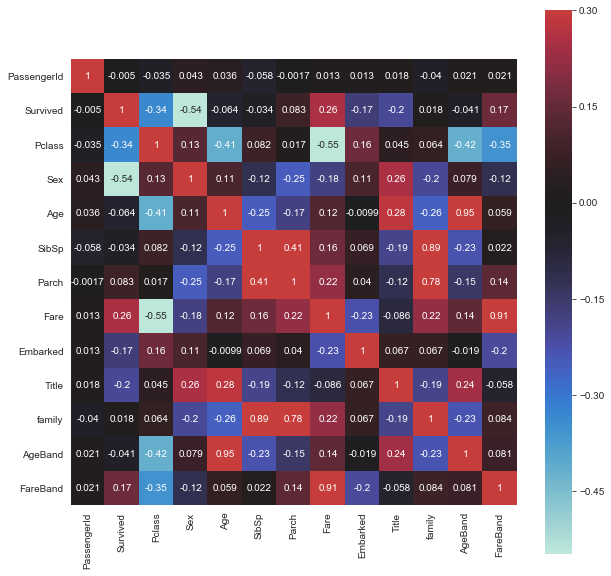

In [12]:
corr = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=.3, square=True, annot=True, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show(ax)

# Linear Regression 

In [13]:
def lin_model(df): 
    print('******* Splits lengths *******')
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'], test_size = 0.2, random_state=5)
    print('train length : %s, test length : %s'%(len(X_train), len(X_test)))
    print('******************************')
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    print('coef : %s'%reg.coef_)
    print('ms_error : %s'%mean_squared_error(y_test, y_pred))
    print('r2 : %s'%r2_score(y_test, y_pred))
    
    to_plot = pd.DataFrame([[y_test.to_numpy()[i], y_pred[i]] for i in range(len(y_test))], columns = ['test', 'pred'])
    to_plot = to_plot.sort_values('test')
    
    plt.plot(list(range(len(to_plot))), to_plot['test'])
    plt.plot(list(range(len(to_plot))), to_plot['pred'])
    
    print('******************************')
    return reg

******* Splits lengths *******
train length : 711, test length : 178
******************************
coef : [-1.57527864e-01 -4.55856396e-01 -5.76059824e-03 -2.57101596e-02
 -4.49160489e-04  2.29782924e-03 -3.48935313e-02 -1.23082373e-02
 -2.61593201e-02 -1.00719606e-02 -2.33108140e-01]
ms_error : 0.11942652953651617
r2 : 0.4610582307598664
******************************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

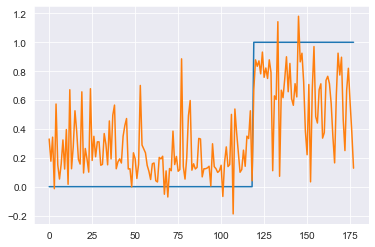

In [14]:
lin_model(features)

# Logisitic Regression

In [15]:
import itertools
def bruteforce(df):
    features = df.drop(['Survived'], axis=1)
    target = df['Survived']
    
    combs = []
    for i in range(2, len(features.columns)):
        for comb in itertools.combinations(features, i):
            combs.append(comb)
    
    rows = []
    for i in range(len(combs)):
        X_train, X_test, y_train, y_test = train_test_split(features[list(combs[i])], target, test_size = 0.2, random_state=5)
        clf = LogisticRegression(solver='lbfgs')
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        M = confusion_matrix(y_test, pred)
        rows.append([combs[i], clf.score(X_test, y_test), roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), M[0,1], M[1,0]])
        print('%s/%s - %s'%(i, len(combs), i/len(combs)*100))
    return rows

In [16]:
result = pd.DataFrame(bruteforce(features), columns=['comb', 'score', 'auc', 'fp', 'tn'])

0/2035 - 0.0
1/2035 - 0.04914004914004914
2/2035 - 0.09828009828009827
3/2035 - 0.14742014742014742
4/2035 - 0.19656019656019655
5/2035 - 0.2457002457002457
6/2035 - 0.29484029484029484
7/2035 - 0.343980343980344
8/2035 - 0.3931203931203931
9/2035 - 0.4422604422604423
10/2035 - 0.4914004914004914
11/2035 - 0.5405405405405406
12/2035 - 0.5896805896805897
13/2035 - 0.6388206388206389
14/2035 - 0.687960687960688
15/2035 - 0.7371007371007371
16/2035 - 0.7862407862407862
17/2035 - 0.8353808353808353
18/2035 - 0.8845208845208846
19/2035 - 0.9336609336609337
20/2035 - 0.9828009828009828
21/2035 - 1.0319410319410318
22/2035 - 1.0810810810810811
23/2035 - 1.1302211302211302
24/2035 - 1.1793611793611793
25/2035 - 1.2285012285012284
26/2035 - 1.2776412776412778
27/2035 - 1.3267813267813269
28/2035 - 1.375921375921376
29/2035 - 1.425061425061425
30/2035 - 1.4742014742014742
31/2035 - 1.5233415233415233
32/2035 - 1.5724815724815724
33/2035 - 1.6216216216216217
34/2035 - 1.6707616707616706
35/2035 -

282/2035 - 13.857493857493857
283/2035 - 13.906633906633905
284/2035 - 13.955773955773957
285/2035 - 14.004914004914005
286/2035 - 14.054054054054054
287/2035 - 14.103194103194102
288/2035 - 14.152334152334154
289/2035 - 14.201474201474202
290/2035 - 14.250614250614252
291/2035 - 14.2997542997543
292/2035 - 14.348894348894348
293/2035 - 14.398034398034397
294/2035 - 14.447174447174445
295/2035 - 14.496314496314497
296/2035 - 14.545454545454545
297/2035 - 14.594594594594595
298/2035 - 14.643734643734643
299/2035 - 14.692874692874694
300/2035 - 14.742014742014742
301/2035 - 14.791154791154792
302/2035 - 14.84029484029484
303/2035 - 14.889434889434888
304/2035 - 14.93857493857494
305/2035 - 14.987714987714988
306/2035 - 15.036855036855037
307/2035 - 15.085995085995085
308/2035 - 15.135135135135137
309/2035 - 15.184275184275183
310/2035 - 15.233415233415235
311/2035 - 15.282555282555283
312/2035 - 15.331695331695332
313/2035 - 15.38083538083538
314/2035 - 15.429975429975428
315/2035 - 15.4

562/2035 - 27.616707616707615
563/2035 - 27.665847665847664
564/2035 - 27.714987714987714
565/2035 - 27.764127764127768
566/2035 - 27.81326781326781
567/2035 - 27.862407862407863
568/2035 - 27.911547911547913
569/2035 - 27.960687960687963
570/2035 - 28.00982800982801
571/2035 - 28.05896805896806
572/2035 - 28.10810810810811
573/2035 - 28.157248157248155
574/2035 - 28.206388206388205
575/2035 - 28.255528255528255
576/2035 - 28.304668304668308
577/2035 - 28.35380835380835
578/2035 - 28.402948402948404
579/2035 - 28.452088452088454
580/2035 - 28.501228501228503
581/2035 - 28.55036855036855
582/2035 - 28.5995085995086
583/2035 - 28.64864864864865
584/2035 - 28.697788697788695
585/2035 - 28.746928746928745
586/2035 - 28.796068796068795
587/2035 - 28.845208845208848
588/2035 - 28.89434889434889
589/2035 - 28.943488943488944
590/2035 - 28.992628992628994
591/2035 - 29.041769041769044
592/2035 - 29.09090909090909
593/2035 - 29.14004914004914
594/2035 - 29.18918918918919
595/2035 - 29.238329238

848/2035 - 41.67076167076167
849/2035 - 41.71990171990172
850/2035 - 41.76904176904177
851/2035 - 41.81818181818181
852/2035 - 41.86732186732186
853/2035 - 41.91646191646192
854/2035 - 41.96560196560197
855/2035 - 42.01474201474201
856/2035 - 42.06388206388206
857/2035 - 42.11302211302211
858/2035 - 42.16216216216216
859/2035 - 42.21130221130221
860/2035 - 42.26044226044226
861/2035 - 42.30958230958231
862/2035 - 42.35872235872235
863/2035 - 42.40786240786241
864/2035 - 42.45700245700246
865/2035 - 42.50614250614251
866/2035 - 42.55528255528255
867/2035 - 42.6044226044226
868/2035 - 42.65356265356265
869/2035 - 42.7027027027027
870/2035 - 42.75184275184275
871/2035 - 42.8009828009828
872/2035 - 42.85012285012285
873/2035 - 42.899262899262894
874/2035 - 42.94840294840295
875/2035 - 42.997542997543
876/2035 - 43.04668304668305
877/2035 - 43.09582309582309
878/2035 - 43.14496314496314
879/2035 - 43.19410319410319
880/2035 - 43.24324324324324
881/2035 - 43.29238329238329
882/2035 - 43.3415

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1065/2035 - 52.33415233415234
1066/2035 - 52.38329238329238
1067/2035 - 52.43243243243243
1068/2035 - 52.48157248157248
1069/2035 - 52.530712530712535
1070/2035 - 52.579852579852584
1071/2035 - 52.628992628992634
1072/2035 - 52.678132678132684
1073/2035 - 52.72727272727272
1074/2035 - 52.776412776412776
1075/2035 - 52.825552825552826
1076/2035 - 52.874692874692876
1077/2035 - 52.923832923832926
1078/2035 - 52.972972972972975
1079/2035 - 53.022113022113025
1080/2035 - 53.07125307125307
1081/2035 - 53.12039312039312
1082/2035 - 53.16953316953317
1083/2035 - 53.21867321867322
1084/2035 - 53.26781326781327
1085/2035 - 53.31695331695332
1086/2035 - 53.36609336609337
1087/2035 - 53.41523341523342
1088/2035 - 53.46437346437346
1089/2035 - 53.51351351351351
1090/2035 - 53.56265356265356


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1091/2035 - 53.611793611793615
1092/2035 - 53.660933660933665
1093/2035 - 53.710073710073715
1094/2035 - 53.759213759213765
1095/2035 - 53.8083538083538
1096/2035 - 53.85749385749386
1097/2035 - 53.90663390663391
1098/2035 - 53.95577395577396
1099/2035 - 54.004914004914006
1100/2035 - 54.054054054054056
1101/2035 - 54.103194103194106
1102/2035 - 54.15233415233415
1103/2035 - 54.2014742014742
1104/2035 - 54.25061425061425
1105/2035 - 54.2997542997543
1106/2035 - 54.34889434889435
1107/2035 - 54.3980343980344
1108/2035 - 54.447174447174454
1109/2035 - 54.496314496314504
1110/2035 - 54.54545454545454
1111/2035 - 54.59459459459459
1112/2035 - 54.643734643734646
1113/2035 - 54.692874692874696
1114/2035 - 54.742014742014746
1115/2035 - 54.791154791154796
1116/2035 - 54.840294840294845
1117/2035 - 54.88943488943489
1118/2035 - 54.93857493857494
1119/2035 - 54.98771498771499
1120/2035 - 55.03685503685504
1121/2035 - 55.08599508599509
1122/2035 - 55.13513513513514
1123/2035 - 55.18427518427519


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1172/2035 - 57.59213759213759
1173/2035 - 57.64127764127765
1174/2035 - 57.690417690417696
1175/2035 - 57.73955773955773
1176/2035 - 57.78869778869778
1177/2035 - 57.83783783783784
1178/2035 - 57.88697788697789
1179/2035 - 57.93611793611794
1180/2035 - 57.98525798525799
1181/2035 - 58.03439803439804
1182/2035 - 58.08353808353809
1183/2035 - 58.13267813267813
1184/2035 - 58.18181818181818
1185/2035 - 58.23095823095823
1186/2035 - 58.28009828009828
1187/2035 - 58.32923832923833
1188/2035 - 58.37837837837838
1189/2035 - 58.427518427518436
1190/2035 - 58.47665847665847
1191/2035 - 58.52579852579852
1192/2035 - 58.57493857493857
1193/2035 - 58.62407862407862
1194/2035 - 58.67321867321868
1195/2035 - 58.72235872235873
1196/2035 - 58.77149877149878
1197/2035 - 58.82063882063881
1198/2035 - 58.86977886977887
1199/2035 - 58.91891891891892
1200/2035 - 58.96805896805897
1201/2035 - 59.01719901719902
1202/2035 - 59.06633906633907
1203/2035 - 59.11547911547912
1204/2035 - 59.16461916461917
1205/20

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1219/2035 - 59.90171990171989
1220/2035 - 59.95085995085995
1221/2035 - 60.0
1222/2035 - 60.04914004914005
1223/2035 - 60.0982800982801
1224/2035 - 60.14742014742015
1225/2035 - 60.1965601965602
1226/2035 - 60.24570024570025
1227/2035 - 60.29484029484029
1228/2035 - 60.34398034398034
1229/2035 - 60.39312039312039
1230/2035 - 60.44226044226044
1231/2035 - 60.49140049140049
1232/2035 - 60.54054054054055
1233/2035 - 60.5896805896806
1234/2035 - 60.63882063882063
1235/2035 - 60.68796068796068
1236/2035 - 60.73710073710073
1237/2035 - 60.78624078624079
1238/2035 - 60.83538083538084


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1239/2035 - 60.88452088452089
1240/2035 - 60.93366093366094
1241/2035 - 60.98280098280098
1242/2035 - 61.03194103194103
1243/2035 - 61.08108108108108
1244/2035 - 61.13022113022113
1245/2035 - 61.17936117936118
1246/2035 - 61.22850122850123
1247/2035 - 61.27764127764128
1248/2035 - 61.32678132678133
1249/2035 - 61.37592137592137
1250/2035 - 61.42506142506142
1251/2035 - 61.47420147420147
1252/2035 - 61.52334152334152
1253/2035 - 61.57248157248157
1254/2035 - 61.62162162162163
1255/2035 - 61.67076167076168
1256/2035 - 61.71990171990171
1257/2035 - 61.76904176904176
1258/2035 - 61.81818181818181
1259/2035 - 61.86732186732187
1260/2035 - 61.91646191646192
1261/2035 - 61.96560196560197
1262/2035 - 62.01474201474202
1263/2035 - 62.06388206388206
1264/2035 - 62.11302211302211
1265/2035 - 62.16216216216216
1266/2035 - 62.21130221130221
1267/2035 - 62.26044226044226
1268/2035 - 62.30958230958231
1269/2035 - 62.35872235872236
1270/2035 - 62.40786240786241
1271/2035 - 62.45700245700245
1272/2035 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1483/2035 - 72.87469287469287
1484/2035 - 72.92383292383292
1485/2035 - 72.97297297297297
1486/2035 - 73.02211302211302
1487/2035 - 73.07125307125307
1488/2035 - 73.12039312039312


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1489/2035 - 73.16953316953317
1490/2035 - 73.21867321867322
1491/2035 - 73.26781326781327
1492/2035 - 73.31695331695332
1493/2035 - 73.36609336609337


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1494/2035 - 73.41523341523342
1495/2035 - 73.46437346437347
1496/2035 - 73.51351351351352
1497/2035 - 73.56265356265355
1498/2035 - 73.6117936117936
1499/2035 - 73.66093366093367


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1500/2035 - 73.71007371007371
1501/2035 - 73.75921375921376
1502/2035 - 73.80835380835381
1503/2035 - 73.85749385749386
1504/2035 - 73.90663390663391
1505/2035 - 73.95577395577395
1506/2035 - 74.004914004914
1507/2035 - 74.05405405405405

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.



1508/2035 - 74.1031941031941
1509/2035 - 74.15233415233415
1510/2035 - 74.2014742014742
1511/2035 - 74.25061425061426
1512/2035 - 74.2997542997543
1513/2035 - 74.34889434889435


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1514/2035 - 74.3980343980344
1515/2035 - 74.44717444717445
1516/2035 - 74.4963144963145
1517/2035 - 74.54545454545455
1518/2035 - 74.5945945945946
1519/2035 - 74.64373464373463
1520/2035 - 74.69287469287468
1521/2035 - 74.74201474201475


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1522/2035 - 74.7911547911548
1523/2035 - 74.84029484029485
1524/2035 - 74.8894348894349
1525/2035 - 74.93857493857494
1526/2035 - 74.987714987715
1527/2035 - 75.03685503685503
1528/2035 - 75.08599508599508


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1529/2035 - 75.13513513513513
1530/2035 - 75.18427518427518
1531/2035 - 75.23341523341523
1532/2035 - 75.28255528255528
1533/2035 - 75.33169533169534
1534/2035 - 75.38083538083538
1535/2035 - 75.42997542997543


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1536/2035 - 75.47911547911548
1537/2035 - 75.52825552825553
1538/2035 - 75.57739557739558
1539/2035 - 75.62653562653563
1540/2035 - 75.67567567567568
1541/2035 - 75.72481572481571
1542/2035 - 75.77395577395578
1543/2035 - 75.82309582309583
1544/2035 - 75.87223587223588
1545/2035 - 75.92137592137593
1546/2035 - 75.97051597051598
1547/2035 - 76.01965601965603
1548/2035 - 76.06879606879608
1549/2035 - 76.11793611793611


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1550/2035 - 76.16707616707616
1551/2035 - 76.21621621621621
1552/2035 - 76.26535626535626
1553/2035 - 76.31449631449631
1554/2035 - 76.36363636363637
1555/2035 - 76.41277641277642
1556/2035 - 76.46191646191646
1557/2035 - 76.51105651105651
1558/2035 - 76.56019656019656
1559/2035 - 76.60933660933661
1560/2035 - 76.65847665847666


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1561/2035 - 76.70761670761671
1562/2035 - 76.75675675675676
1563/2035 - 76.8058968058968
1564/2035 - 76.85503685503686
1565/2035 - 76.90417690417691
1566/2035 - 76.95331695331696
1567/2035 - 77.002457002457
1568/2035 - 77.05159705159706


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1569/2035 - 77.1007371007371
1570/2035 - 77.14987714987716
1571/2035 - 77.19901719901719
1572/2035 - 77.24815724815724
1573/2035 - 77.29729729729729
1574/2035 - 77.34643734643734
1575/2035 - 77.39557739557739
1576/2035 - 77.44471744471745
1577/2035 - 77.4938574938575
1578/2035 - 77.54299754299754

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1579/2035 - 77.59213759213759
1580/2035 - 77.64127764127764
1581/2035 - 77.69041769041769
1582/2035 - 77.73955773955774
1583/2035 - 77.78869778869779
1584/2035 - 77.83783783783784


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1585/2035 - 77.88697788697789
1586/2035 - 77.93611793611794
1587/2035 - 77.98525798525799
1588/2035 - 78.03439803439804
1589/2035 - 78.08353808353809

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1590/2035 - 78.13267813267814
1591/2035 - 78.18181818181819
1592/2035 - 78.23095823095824
1593/2035 - 78.28009828009827
1594/2035 - 78.32923832923832


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1595/2035 - 78.37837837837837
1596/2035 - 78.42751842751842
1597/2035 - 78.47665847665849
1598/2035 - 78.52579852579854
1599/2035 - 78.57493857493859


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1600/2035 - 78.62407862407862
1601/2035 - 78.67321867321867
1602/2035 - 78.72235872235872
1603/2035 - 78.77149877149877
1604/2035 - 78.82063882063882
1605/2035 - 78.86977886977887


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1606/2035 - 78.91891891891892
1607/2035 - 78.96805896805897
1608/2035 - 79.01719901719902
1609/2035 - 79.06633906633907
1610/2035 - 79.11547911547912
1611/2035 - 79.16461916461917
1612/2035 - 79.21375921375922
1613/2035 - 79.26289926289927
1614/2035 - 79.31203931203932
1615/2035 - 79.36117936117935
1616/2035 - 79.4103194103194
1617/2035 - 79.45945945945945
1618/2035 - 79.5085995085995
1619/2035 - 79.55773955773957
1620/2035 - 79.60687960687962
1621/2035 - 79.65601965601967
1622/2035 - 79.7051597051597
1623/2035 - 79.75429975429975


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1624/2035 - 79.8034398034398
1625/2035 - 79.85257985257985
1626/2035 - 79.9017199017199
1627/2035 - 79.95085995085995
1628/2035 - 80.0
1629/2035 - 80.04914004914005
1630/2035 - 80.0982800982801

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1631/2035 - 80.14742014742015
1632/2035 - 80.1965601965602
1633/2035 - 80.24570024570025
1634/2035 - 80.2948402948403
1635/2035 - 80.34398034398035


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1636/2035 - 80.3931203931204
1637/2035 - 80.44226044226043
1638/2035 - 80.49140049140048
1639/2035 - 80.54054054054053
1640/2035 - 80.5896805896806
1641/2035 - 80.63882063882065
1642/2035 - 80.6879606879607


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1643/2035 - 80.73710073710075
1644/2035 - 80.78624078624078
1645/2035 - 80.83538083538083
1646/2035 - 80.88452088452088
1647/2035 - 80.93366093366093
1648/2035 - 80.98280098280098
1649/2035 - 81.03194103194103
1650/2035 - 81.08108108108108
1651/2035 - 81.13022113022113
1652/2035 - 81.17936117936118
1653/2035 - 81.22850122850123
1654/2035 - 81.27764127764128
1655/2035 - 81.32678132678133

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1656/2035 - 81.37592137592138
1657/2035 - 81.42506142506143
1658/2035 - 81.47420147420148
1659/2035 - 81.52334152334151
1660/2035 - 81.57248157248156
1661/2035 - 81.62162162162161
1662/2035 - 81.67076167076168


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1663/2035 - 81.71990171990173
1664/2035 - 81.76904176904178
1665/2035 - 81.81818181818183
1666/2035 - 81.86732186732186
1667/2035 - 81.91646191646191
1668/2035 - 81.96560196560196
1669/2035 - 82.01474201474201
1670/2035 - 82.06388206388206


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1671/2035 - 82.11302211302211
1672/2035 - 82.16216216216216
1673/2035 - 82.21130221130221
1674/2035 - 82.26044226044226
1675/2035 - 82.30958230958231

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1676/2035 - 82.35872235872236
1677/2035 - 82.40786240786241
1678/2035 - 82.45700245700246
1679/2035 - 82.50614250614251
1680/2035 - 82.55528255528255
1681/2035 - 82.6044226044226
1682/2035 - 82.65356265356264
1683/2035 - 82.70270270270271
1684/2035 - 82.75184275184276
1685/2035 - 82.80098280098281
1686/2035 - 82.85012285012286
1687/2035 - 82.89926289926291

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1688/2035 - 82.94840294840294
1689/2035 - 82.997542997543
1690/2035 - 83.04668304668304
1691/2035 - 83.09582309582309
1692/2035 - 83.14496314496314
1693/2035 - 83.19410319410319
1694/2035 - 83.24324324324324
1695/2035 - 83.29238329238329
1696/2035 - 83.34152334152334
1697/2035 - 83.39066339066339
1698/2035 - 83.43980343980344
1699/2035 - 83.48894348894349
1700/2035 - 83.53808353808354
1701/2035 - 83.58722358722359


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1702/2035 - 83.63636363636363
1703/2035 - 83.68550368550368
1704/2035 - 83.73464373464373
1705/2035 - 83.78378378378379
1706/2035 - 83.83292383292384
1707/2035 - 83.88206388206389


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1708/2035 - 83.93120393120394
1709/2035 - 83.98034398034399
1710/2035 - 84.02948402948402
1711/2035 - 84.07862407862407
1712/2035 - 84.12776412776412
1713/2035 - 84.17690417690417
1714/2035 - 84.22604422604422
1715/2035 - 84.27518427518427
1716/2035 - 84.32432432432432
1717/2035 - 84.37346437346437
1718/2035 - 84.42260442260442
1719/2035 - 84.47174447174447
1720/2035 - 84.52088452088452
1721/2035 - 84.57002457002457
1722/2035 - 84.61916461916462


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1723/2035 - 84.66830466830467
1724/2035 - 84.7174447174447
1725/2035 - 84.76658476658476
1726/2035 - 84.81572481572482
1727/2035 - 84.86486486486487


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1728/2035 - 84.91400491400492
1729/2035 - 84.96314496314497
1730/2035 - 85.01228501228502
1731/2035 - 85.06142506142507
1732/2035 - 85.1105651105651
1733/2035 - 85.15970515970515
1734/2035 - 85.2088452088452


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1735/2035 - 85.25798525798525
1736/2035 - 85.3071253071253
1737/2035 - 85.35626535626535
1738/2035 - 85.4054054054054
1739/2035 - 85.45454545454545
1740/2035 - 85.5036855036855
1741/2035 - 85.55282555282555
1742/2035 - 85.6019656019656
1743/2035 - 85.65110565110565
1744/2035 - 85.7002457002457
1745/2035 - 85.74938574938575
1746/2035 - 85.79852579852579
1747/2035 - 85.84766584766584
1748/2035 - 85.8968058968059
1749/2035 - 85.94594594594595
1750/2035 - 85.995085995086
1751/2035 - 86.04422604422605
1752/2035 - 86.0933660933661
1753/2035 - 86.14250614250615
1754/2035 - 86.19164619164619
1755/2035 - 86.24078624078624
1756/2035 - 86.28992628992629

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1757/2035 - 86.33906633906633
1758/2035 - 86.38820638820638
1759/2035 - 86.43734643734643
1760/2035 - 86.48648648648648
1761/2035 - 86.53562653562653
1762/2035 - 86.58476658476658

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1763/2035 - 86.63390663390663
1764/2035 - 86.68304668304668
1765/2035 - 86.73218673218673
1766/2035 - 86.78132678132678
1767/2035 - 86.83046683046683
1768/2035 - 86.87960687960687
1769/2035 - 86.92874692874693
1770/2035 - 86.97788697788698
1771/2035 - 87.02702702702703
1772/2035 - 87.07616707616708
1773/2035 - 87.12530712530713
1774/2035 - 87.17444717444718
1775/2035 - 87.22358722358723
1776/2035 - 87.27272727272727
1777/2035 - 87.32186732186732
1778/2035 - 87.37100737100737
1779/2035 - 87.42014742014742


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1780/2035 - 87.46928746928747
1781/2035 - 87.51842751842752
1782/2035 - 87.56756756756758
1783/2035 - 87.61670761670761
1784/2035 - 87.66584766584766
1785/2035 - 87.71498771498771
1786/2035 - 87.76412776412776


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1787/2035 - 87.81326781326781
1788/2035 - 87.86240786240786
1789/2035 - 87.91154791154791
1790/2035 - 87.96068796068795
1791/2035 - 88.00982800982801
1792/2035 - 88.05896805896806
1793/2035 - 88.10810810810811

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1794/2035 - 88.15724815724816
1795/2035 - 88.20638820638821
1796/2035 - 88.25552825552826
1797/2035 - 88.30466830466831
1798/2035 - 88.35380835380835
1799/2035 - 88.4029484029484
1800/2035 - 88.45208845208845
1801/2035 - 88.5012285012285
1802/2035 - 88.55036855036855
1803/2035 - 88.5995085995086
1804/2035 - 88.64864864864866
1805/2035 - 88.6977886977887


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1806/2035 - 88.74692874692875
1807/2035 - 88.7960687960688
1808/2035 - 88.84520884520884
1809/2035 - 88.8943488943489
1810/2035 - 88.94348894348894
1811/2035 - 88.992628992629


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1812/2035 - 89.04176904176904
1813/2035 - 89.0909090909091
1814/2035 - 89.14004914004914
1815/2035 - 89.1891891891892
1816/2035 - 89.23832923832924
1817/2035 - 89.28746928746929
1818/2035 - 89.33660933660934
1819/2035 - 89.38574938574939
1820/2035 - 89.43488943488943
1821/2035 - 89.48402948402948
1822/2035 - 89.53316953316953
1823/2035 - 89.58230958230958
1824/2035 - 89.63144963144963


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1825/2035 - 89.68058968058969
1826/2035 - 89.72972972972974
1827/2035 - 89.77886977886978
1828/2035 - 89.82800982800983


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1829/2035 - 89.87714987714988
1830/2035 - 89.92628992628993
1831/2035 - 89.97542997542998
1832/2035 - 90.02457002457002
1833/2035 - 90.07371007371007
1834/2035 - 90.12285012285012
1835/2035 - 90.17199017199017

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1836/2035 - 90.22113022113022
1837/2035 - 90.27027027027027
1838/2035 - 90.31941031941032
1839/2035 - 90.36855036855037
1840/2035 - 90.41769041769042
1841/2035 - 90.46683046683047


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1842/2035 - 90.51597051597051
1843/2035 - 90.56511056511056
1844/2035 - 90.61425061425061
1845/2035 - 90.66339066339066
1846/2035 - 90.71253071253071
1847/2035 - 90.76167076167077
1848/2035 - 90.81081081081082
1849/2035 - 90.85995085995086

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1850/2035 - 90.9090909090909
1851/2035 - 90.95823095823096
1852/2035 - 91.007371007371
1853/2035 - 91.05651105651106


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1854/2035 - 91.1056511056511
1855/2035 - 91.15479115479116
1856/2035 - 91.2039312039312
1857/2035 - 91.25307125307125
1858/2035 - 91.3022113022113
1859/2035 - 91.35135135135135
1860/2035 - 91.4004914004914
1861/2035 - 91.44963144963145
1862/2035 - 91.4987714987715
1863/2035 - 91.54791154791154
1864/2035 - 91.59705159705159
1865/2035 - 91.64619164619164
1866/2035 - 91.69533169533169
1867/2035 - 91.74447174447174


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1868/2035 - 91.7936117936118
1869/2035 - 91.84275184275185
1870/2035 - 91.8918918918919
1871/2035 - 91.94103194103194
1872/2035 - 91.99017199017199
1873/2035 - 92.03931203931204
1874/2035 - 92.08845208845209
1875/2035 - 92.13759213759214


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1876/2035 - 92.18673218673219
1877/2035 - 92.23587223587224
1878/2035 - 92.28501228501229
1879/2035 - 92.33415233415234
1880/2035 - 92.38329238329239


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1881/2035 - 92.43243243243244
1882/2035 - 92.48157248157248
1883/2035 - 92.53071253071253
1884/2035 - 92.57985257985258
1885/2035 - 92.62899262899262


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1886/2035 - 92.67813267813267
1887/2035 - 92.72727272727272
1888/2035 - 92.77641277641277
1889/2035 - 92.82555282555282

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1890/2035 - 92.87469287469288
1891/2035 - 92.92383292383293
1892/2035 - 92.97297297297298


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1893/2035 - 93.02211302211302
1894/2035 - 93.07125307125307
1895/2035 - 93.12039312039312
1896/2035 - 93.16953316953317
1897/2035 - 93.21867321867322
1898/2035 - 93.26781326781327
1899/2035 - 93.31695331695332
1900/2035 - 93.36609336609337

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1901/2035 - 93.41523341523342
1902/2035 - 93.46437346437347
1903/2035 - 93.51351351351352
1904/2035 - 93.56265356265357
1905/2035 - 93.61179361179362
1906/2035 - 93.66093366093367
1907/2035 - 93.7100737100737
1908/2035 - 93.75921375921375

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.



1909/2035 - 93.8083538083538
1910/2035 - 93.85749385749385
1911/2035 - 93.90663390663391
1912/2035 - 93.95577395577396
1913/2035 - 94.00491400491401
1914/2035 - 94.05405405405406


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1915/2035 - 94.1031941031941
1916/2035 - 94.15233415233415
1917/2035 - 94.2014742014742
1918/2035 - 94.25061425061425
1919/2035 - 94.2997542997543
1920/2035 - 94.34889434889435
1921/2035 - 94.3980343980344


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1922/2035 - 94.44717444717445
1923/2035 - 94.4963144963145
1924/2035 - 94.54545454545455
1925/2035 - 94.5945945945946
1926/2035 - 94.64373464373465
1927/2035 - 94.6928746928747
1928/2035 - 94.74201474201475


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1929/2035 - 94.79115479115478
1930/2035 - 94.84029484029483
1931/2035 - 94.88943488943488
1932/2035 - 94.93857493857493
1933/2035 - 94.987714987715


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1934/2035 - 95.03685503685504
1935/2035 - 95.0859950859951
1936/2035 - 95.13513513513514
1937/2035 - 95.18427518427518
1938/2035 - 95.23341523341523


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1939/2035 - 95.28255528255528
1940/2035 - 95.33169533169533
1941/2035 - 95.38083538083538
1942/2035 - 95.42997542997543
1943/2035 - 95.47911547911548


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1944/2035 - 95.52825552825553
1945/2035 - 95.57739557739558
1946/2035 - 95.62653562653563


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1947/2035 - 95.67567567567568
1948/2035 - 95.72481572481573
1949/2035 - 95.77395577395578
1950/2035 - 95.82309582309583


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1951/2035 - 95.87223587223586
1952/2035 - 95.92137592137591
1953/2035 - 95.97051597051596
1954/2035 - 96.01965601965603
1955/2035 - 96.06879606879608
1956/2035 - 96.11793611793613
1957/2035 - 96.16707616707617
1958/2035 - 96.21621621621622
1959/2035 - 96.26535626535626
1960/2035 - 96.31449631449631
1961/2035 - 96.36363636363636
1962/2035 - 96.41277641277641


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1963/2035 - 96.46191646191646
1964/2035 - 96.51105651105651
1965/2035 - 96.56019656019656
1966/2035 - 96.60933660933661
1967/2035 - 96.65847665847666
1968/2035 - 96.70761670761671
1969/2035 - 96.75675675675676
1970/2035 - 96.80589680589681


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1971/2035 - 96.85503685503686
1972/2035 - 96.90417690417691
1973/2035 - 96.95331695331694
1974/2035 - 97.00245700245699


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1975/2035 - 97.05159705159704
1976/2035 - 97.1007371007371
1977/2035 - 97.14987714987716
1978/2035 - 97.1990171990172
1979/2035 - 97.24815724815726
1980/2035 - 97.2972972972973

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



1981/2035 - 97.34643734643734
1982/2035 - 97.39557739557739
1983/2035 - 97.44471744471744
1984/2035 - 97.49385749385749
1985/2035 - 97.54299754299754

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.



1986/2035 - 97.59213759213759
1987/2035 - 97.64127764127764
1988/2035 - 97.69041769041769
1989/2035 - 97.73955773955774
1990/2035 - 97.78869778869779
1991/2035 - 97.83783783783784


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1992/2035 - 97.88697788697789
1993/2035 - 97.93611793611794
1994/2035 - 97.98525798525799
1995/2035 - 98.03439803439802
1996/2035 - 98.08353808353807
1997/2035 - 98.13267813267814
1998/2035 - 98.18181818181819


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


1999/2035 - 98.23095823095824
2000/2035 - 98.28009828009829
2001/2035 - 98.32923832923834
2002/2035 - 98.37837837837839
2003/2035 - 98.42751842751842
2004/2035 - 98.47665847665847
2005/2035 - 98.52579852579852


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


2006/2035 - 98.57493857493857
2007/2035 - 98.62407862407862
2008/2035 - 98.67321867321867
2009/2035 - 98.72235872235873
2010/2035 - 98.77149877149877
2011/2035 - 98.82063882063882
2012/2035 - 98.86977886977887


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


2013/2035 - 98.91891891891892
2014/2035 - 98.96805896805897
2015/2035 - 99.01719901719902
2016/2035 - 99.06633906633907
2017/2035 - 99.1154791154791
2018/2035 - 99.16461916461915
2019/2035 - 99.21375921375922


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


2020/2035 - 99.26289926289927
2021/2035 - 99.31203931203932
2022/2035 - 99.36117936117937
2023/2035 - 99.41031941031942
2024/2035 - 99.45945945945947
2025/2035 - 99.5085995085995
2026/2035 - 99.55773955773955
2027/2035 - 99.6068796068796
2028/2035 - 99.65601965601965
2029/2035 - 99.7051597051597
2030/2035 - 99.75429975429975
2031/2035 - 99.80343980343982
2032/2035 - 99.85257985257985


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


2033/2035 - 99.9017199017199
2034/2035 - 99.95085995085995


In [17]:
max_score = result[result['score'] == result['score'].max()]
max_score

,comb,score,auc,fp,tn
1492,"(Pclass, Sex, Age, SibSp, Fare, Embarked, Fare...",0.876404,0.888050,9,13
1876,"(Pclass, Sex, SibSp, Fare, Embarked, Title, fa...",0.876404,0.875516,10,12


In [18]:
max_auc = result[result['auc'] == result['auc'].max()]
max_auc

,comb,score,auc,fp,tn
1016,"(Pclass, Sex, Age, SibSp, Parch, AgeBand)",0.853933,0.891753,11,15


# Try RFE

In [19]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(features.drop(['Survived'], axis=1), features['Survived'], test_size = 0.2, random_state=5)
rfe=RFE(SVR(kernel="linear"),n_features_to_select=1)
names=X_train.columns.tolist()
rfe.fit(X_train,y_train)
print("Features triées par leurs rangs ")
print(sorted(zip(map(lambda x: round(x,4),rfe.ranking_),names)))

Features triées par leurs rangs 
[(1, 'Sex'), (2, 'FareBand'), (3, 'family'), (4, 'AgeBand'), (5, 'Parch'), (6, 'Embarked'), (7, 'Pclass'), (8, 'Age'), (9, 'SibSp'), (10, 'Title'), (11, 'Fare')]
